# Nairobi AirBnb Listing data Analysis
- Data for the last 12 months (upto August 30, 2025)

In [2]:
# import libraries and load data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# load df_listings with information about properties listed
df_listings = pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/listings_raw_data.csv')

# load df_calendar with information on occupancy of the Airbnbs
df_calendar =pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/past_calendar_rates_raw_data.csv')

In [3]:
print(df_listings.shape)
df_listings.head()

(300, 61)


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.500,0.726,20.1,2594.2,29.1,3765.7,45,28,45,90
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.111,0.147,5.8,753.7,7.7,997.5,10,22,80,90
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/01cc7287-2...,20,5634522,Janet,NaN,NaN,...,0.044,0.000,0.9,112.0,0.0,0.0,4,0,86,90
3,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,6.9,890.1,0.0,0.0,5,0,85,90
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/786899c5-b...,58,4856316,Chichi,NaN,NaN,...,0.044,0.055,5.6,727.9,6.9,897.4,4,17,86,90


In [2]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   300 non-null    int64  
 1   listing_name                 300 non-null    object 
 2   listing_type                 300 non-null    object 
 3   room_type                    300 non-null    object 
 4   cover_photo_url              300 non-null    object 
 5   photos_count                 300 non-null    int64  
 6   host_id                      300 non-null    int64  
 7   host_name                    296 non-null    object 
 8   cohost_ids                   75 non-null     object 
 9   cohost_names                 75 non-null     object 
 10  superhost                    300 non-null    bool   
 11  latitude                     300 non-null    float64
 12  longitude                    300 non-null    float64
 13  guests              

In [4]:
print(df_calendar.shape)
df_calendar.head()

(3542, 14)


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,21520917,2024-12-01,22,9,0.29,345.0,37.6,38.3,5.0,9.0,NaN,4960.0,4869.0,44680.0
1,39875956,2025-08-01,31,0,0.00,0.0,69.1,NaN,NaN,NaN,1.0,NaN,8928.0,0.0
2,36253079,2025-04-01,30,0,0.00,0.0,33.7,NaN,NaN,NaN,1.0,NaN,4364.0,0.0
3,40675899,2024-09-01,24,6,0.20,243.0,40.2,40.5,1.0,9.0,NaN,5232.0,5193.0,31391.0
4,21520917,2025-01-01,31,0,0.00,0.0,37.2,NaN,NaN,NaN,1.0,NaN,4805.0,0.0


In [5]:
df_calendar.isnull().sum()

listing_id                   0
date                         0
vacant_days                  0
reserved_days                0
occupancy                    0
revenue                      0
rate_avg                     0
booked_rate_avg           1667
booking_lead_time_avg     1874
length_of_stay_avg        1874
min_nights_avg            1162
native_booked_rate_avg    1667
native_rate_avg              0
native_revenue               0
dtype: int64

### Data Cleaning & wrangling 

- remove duplicates
- deal with null values
- harmonize data type inconsistencies
- remove unnecesary features

In [4]:
# remove duplicates
df_listings.drop_duplicates()
df_calendar.drop_duplicates()
print('duplicates removed')

# remove columns that exceed a 50% threhold for missing values for df_Listings
thresh = int( 0.5 * len(df_listings))
df_listings.dropna(thresh=thresh, axis=1, inplace=True)
print('=> features with extreme Nan_values removed')

duplicates removed
=> features with extreme Nan_values removed


In [5]:
# remove duplicates in df_calendar
df_calendar.drop_duplicates()
print('duplicates removed')

# remove columns that dont meet threhold 60% for nan_values for df_calendar
thresh= int(0.6* len(df_calendar))
df_calendar.dropna(thresh=thresh, axis=1, inplace=True)
print(df_calendar.shape)

# convert date column to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
df_calendar.date.dtypes

duplicates removed
(3542, 10)


dtype('<M8[ns]')

In [6]:
# feature selection and manipulation in df_listings
    # calculate average exchange rate to use during currency conversion
rate = (df_listings.ttm_avg_rate_native / df_listings.ttm_avg_rate).mean()

    # convert cleaning_fee and extra_guest_fee from USD to KSH using the average exchange rate
df_listings.loc[:, 'cleaning_fee'] = round(df_listings['cleaning_fee'] * rate, 2)
df_listings.loc[:, 'extra_guest_fee'] = round(df_listings['extra_guest_fee'] * rate, 2)

    # drop some irrelevant columns and columns in USD currency
df_listings.drop(columns = ['cover_photo_url' ,'rating_overall','ttm_revenue', 'ttm_avg_rate','ttm_revpar', 'ttm_adjusted_revpar', 'l90d_revenue', 
                           'l90d_avg_rate', 'l90d_revpar', 'l90d_adjusted_revpar','currency' ], inplace=True)

    # Check remaining missing values
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,l90d_revenue_native,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar_native,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,233475.0,5202.7,0.500,0.726,2594.2,3765.7,45,28,45,90
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,67833.0,6888.1,0.111,0.147,753.7,997.5,10,22,80,90
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,10078.0,2482.1,0.044,0.000,112.0,0.0,4,0,86,90
3,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,NaN,False,-1.2258,36.7679,...,80106.0,15639.3,0.056,0.000,890.1,0.0,5,0,85,90
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,58,4856316,Chichi,True,-1.3237,36.7059,...,65507.0,16196.3,0.044,0.055,727.9,897.4,4,17,86,90


In [7]:
# rename some cols for easier referrencing 
df_listings.rename(columns= {'num_reviews':'total_reviews','ttm_revenue_native':'total_ttm_revenue', 'ttm_avg_rate_native': 'daily_avg_ttm_rate',
                             'ttm_revpar_native':'ttm_revpar', 'ttm_adjusted_revpar_native':'ttm_adjusted_revpar', 'l90d_revenue_native':'l90d_revenue',
                             'l90d_avg_rate_native':'l90d_avg_rate','l90d_revpar_native':'l90d_revpar', 'l90d_adjusted_revpar_native':'l90d_adjusted_revpar',
                             }, inplace=True)
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,233475.0,5202.7,0.500,0.726,2594.2,3765.7,45,28,45,90
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,67833.0,6888.1,0.111,0.147,753.7,997.5,10,22,80,90
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,10078.0,2482.1,0.044,0.000,112.0,0.0,4,0,86,90
3,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,NaN,False,-1.2258,36.7679,...,80106.0,15639.3,0.056,0.000,890.1,0.0,5,0,85,90
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,58,4856316,Chichi,True,-1.3237,36.7059,...,65507.0,16196.3,0.044,0.055,727.9,897.4,4,17,86,90


In [8]:
# feature manipulation and wrangling in df_calendar
df_calendar.drop(columns=['revenue', 'rate_avg'], inplace=True)
df_calendar.rename(columns={'occupancy':'occupancy_rate', 'native_rate_avg':'rate_avg', 'native_revenue':'revenue'}
                   , inplace=True)
print(df_calendar.shape)
df_calendar.head(2)

(3542, 8)


,listing_id,date,vacant_days,reserved_days,occupancy_rate,min_nights_avg,rate_avg,revenue
0,21520917,2024-12-01,22,9,0.29,NaN,4869.0,44680.0
1,39875956,2025-08-01,31,0,0.00,1.0,8928.0,0.0


### Exploratory data analysis

In [ ]:
# identify the number unique samples in each feature
df_listings.nunique()

# summary stats for numerical features
df_listings.drop(columns =['ttm_total_days', 'l90d_total_days','registration'], inplace=True)
no = ['listing_id', 'host_id','latitude', 'longitude']
num_cols = [col for col in df_listings.select_dtypes(exclude= ['object','bool']) if col not in no ]
df_listings[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
photos_count,300.0,30.266667,16.281046,0.000,19.000,28.0000,37.00000,1.220000e+02
guests,258.0,3.585271,2.265134,1.000,2.000,3.0000,4.00000,1.600000e+01
bedrooms,249.0,2.068273,1.583482,1.000,1.000,2.0000,3.00000,1.500000e+01
beds,297.0,2.195286,2.044004,1.000,1.000,2.0000,3.00000,1.900000e+01
baths,300.0,1.456667,1.169479,0.000,1.000,1.0000,2.00000,8.500000e+00
min_nights,298.0,2.197987,3.454036,1.000,1.000,2.0000,2.00000,3.000000e+01
cleaning_fee,298.0,955.090235,1880.496997,0.000,0.000,0.0000,1291.95000,1.627858e+04
extra_guest_fee,279.0,488.996810,1465.513393,0.000,0.000,0.0000,0.00000,1.291951e+04
total_reviews,300.0,59.513333,73.959289,1.000,19.000,39.0000,77.00000,6.860000e+02
rating_accuracy,290.0,4.801724,0.183668,3.900,4.700,4.8000,4.90000,5.000000e+00


**insights from the summary statistics**

A typical listing:

- Has an average of 2 bedrooms, 1 bathroom and requires a minimum booking of 2 nights

- will cost on average 7,268Ksh to book per day 

- has an average occupancy rate is about 15.66%

- generates on average 535,014.27 Ksh in revenue in 12 months, 90 day revenue(3months) is 120408.26 Ksh

- has  average Adjusted_Revenue_per_available_Room (RevPAR) for the past 12 months is 1,064 Ksh, approximately 1070 Ksh

- Cost on average 960 Ksh to clean which approximately translates to 1,000 Ksh 

- Inlcuding an extra guest will on average cost 488 Ksh ~ 500 Ksh


14


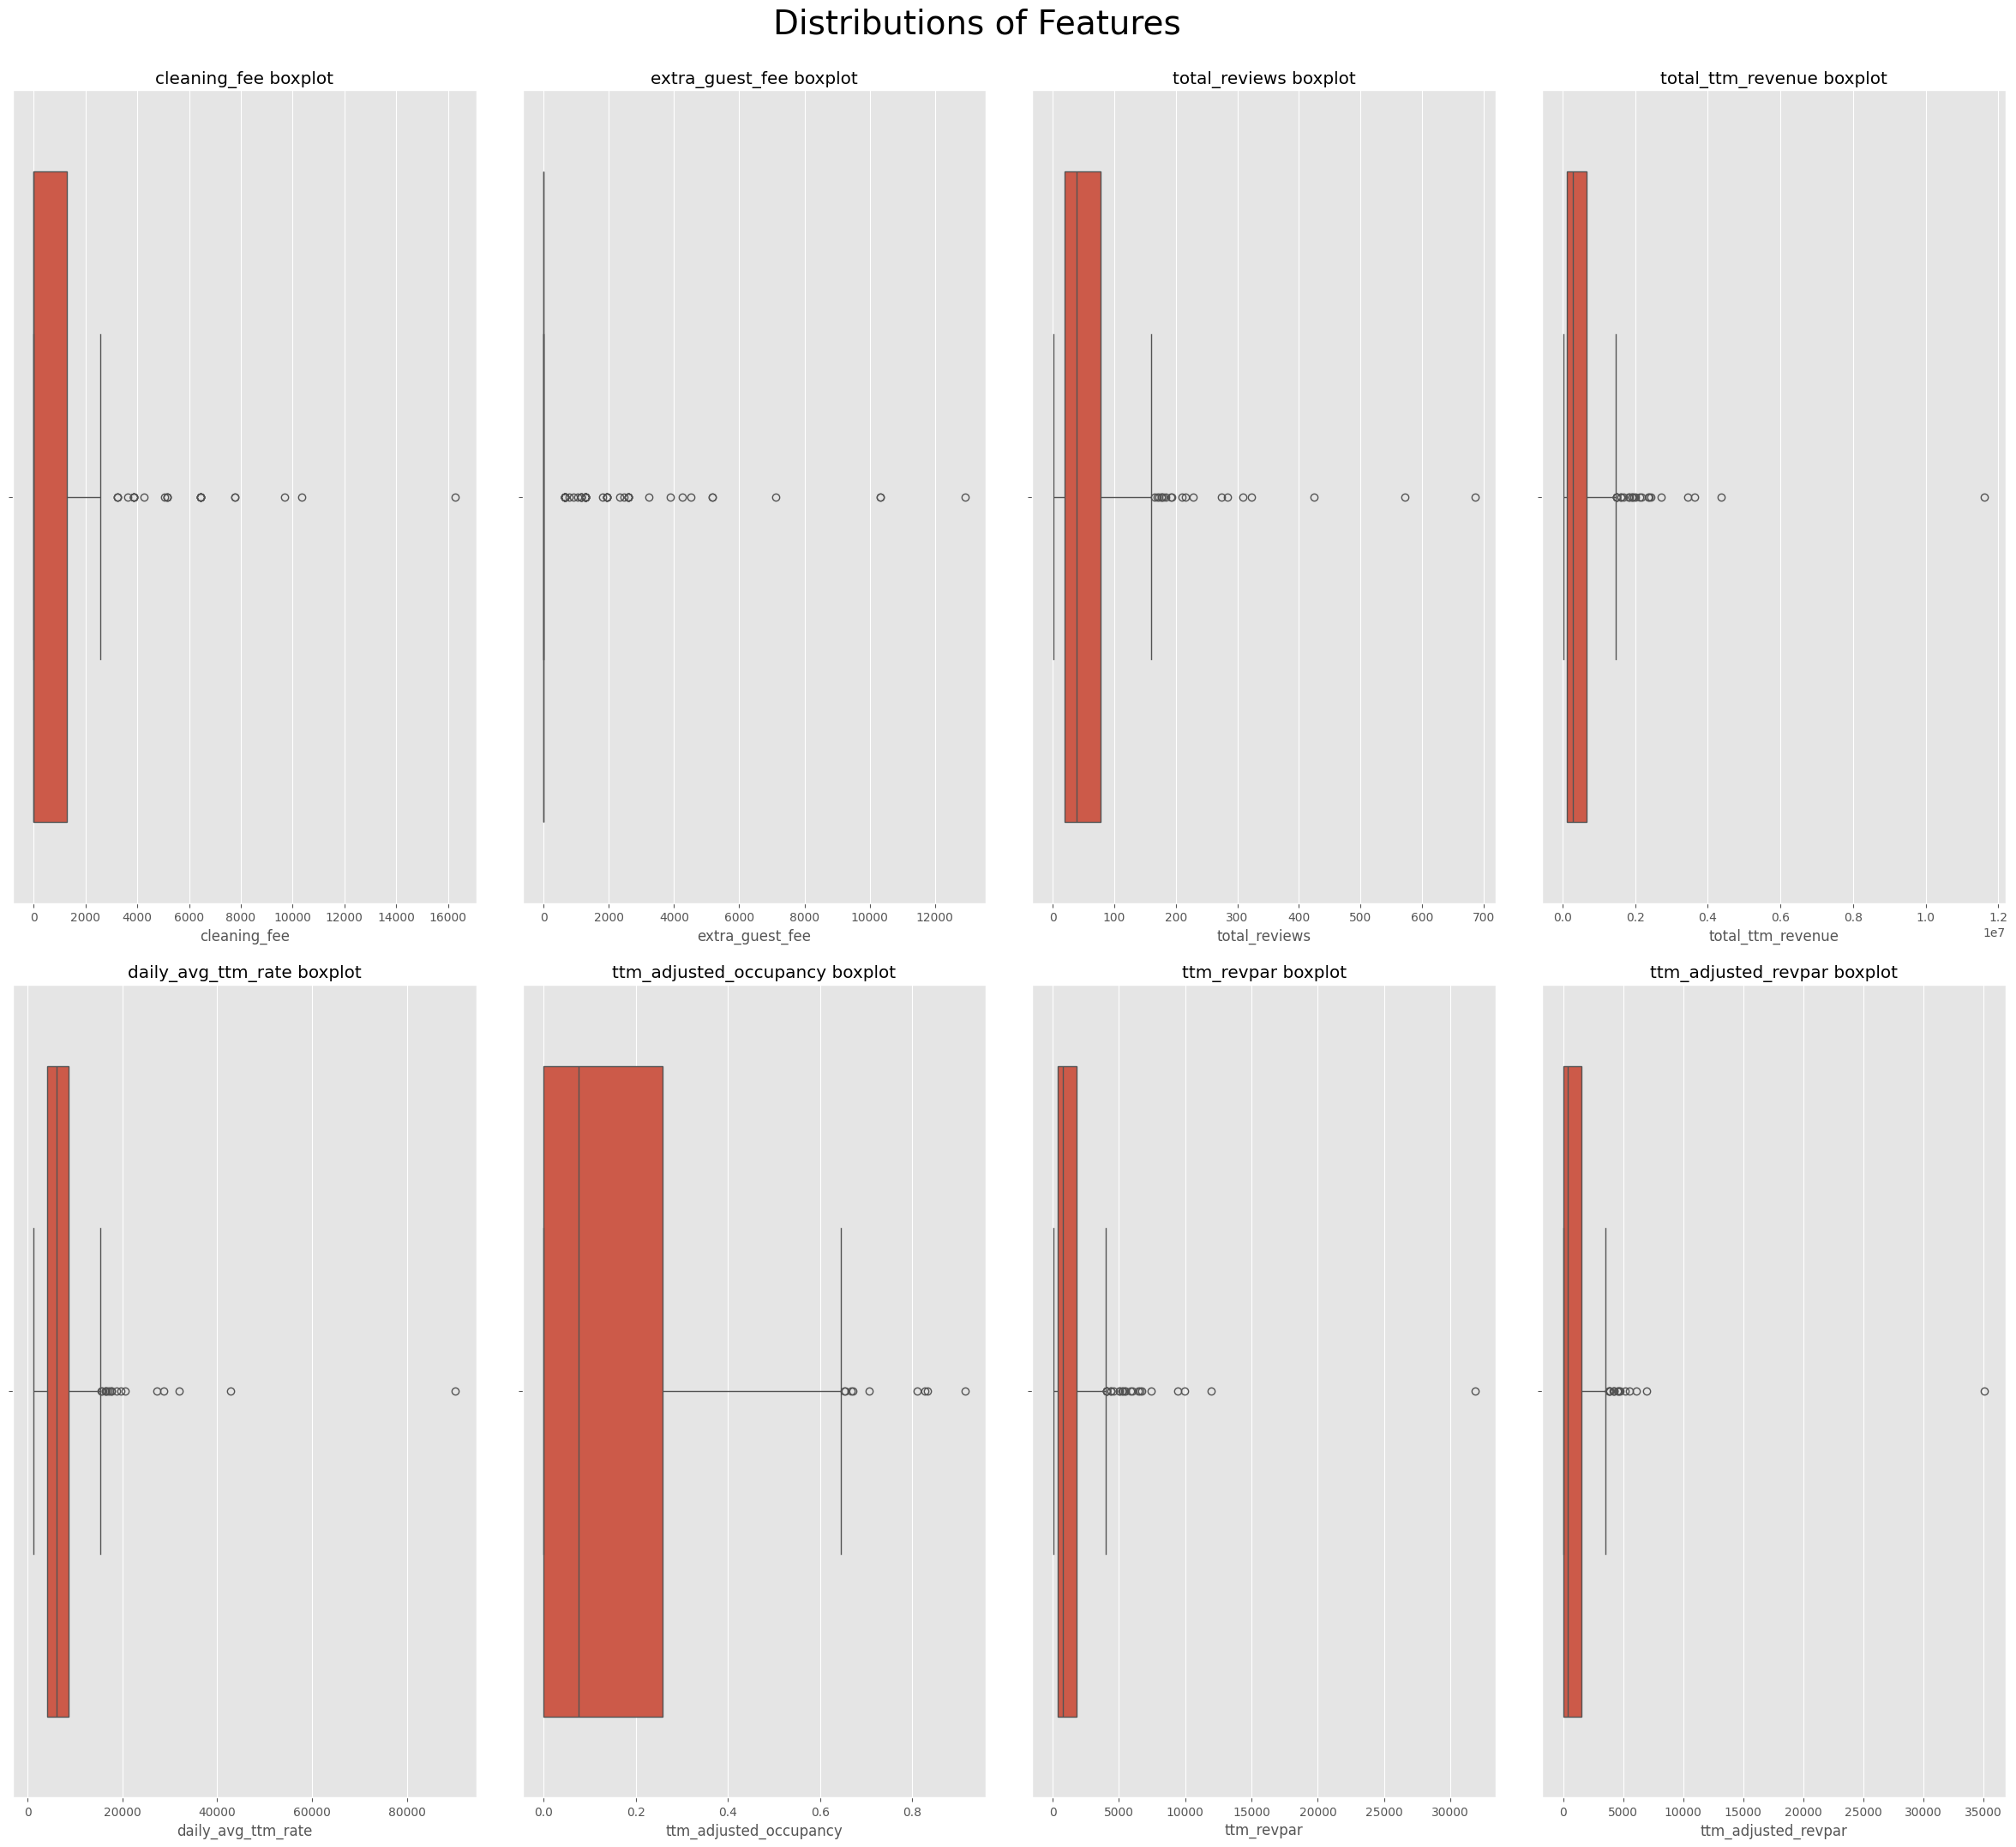

In [13]:
# Plot distributions of the most significant features
cols_listings = ['cleaning_fee','extra_guest_fee', 'total_reviews', 'total_ttm_revenue', 'daily_avg_ttm_rate', 'ttm_adjusted_occupancy',
        'ttm_revpar','ttm_adjusted_revpar', 'ttm_reserved_days', 'ttm_blocked_days','ttm_available_days', 'l90d_revenue',
        'l90d_avg_rate','l90d_adjusted_revpar']
print(len(cols_listings))

def create_distributions(data, cols, nrows, ncols):
    # create the figure canvas
    fig, axs = plt.subplots(nrows,ncols, figsize=(30,24))
    fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.94)
    axs = axs.flatten()

    # plot the boxplots
    for i, col in enumerate(cols):
        if i < len(cols):
            sns.boxplot(data=data, x=col ,ax=axs[i] )
            axs[i].set_title(f'{col} boxplot')
        else:
            break
    fig.suptitle('Distributions of Features', fontsize=28)

create_distributions(df_listings, cols_listings[:8], 2,4)

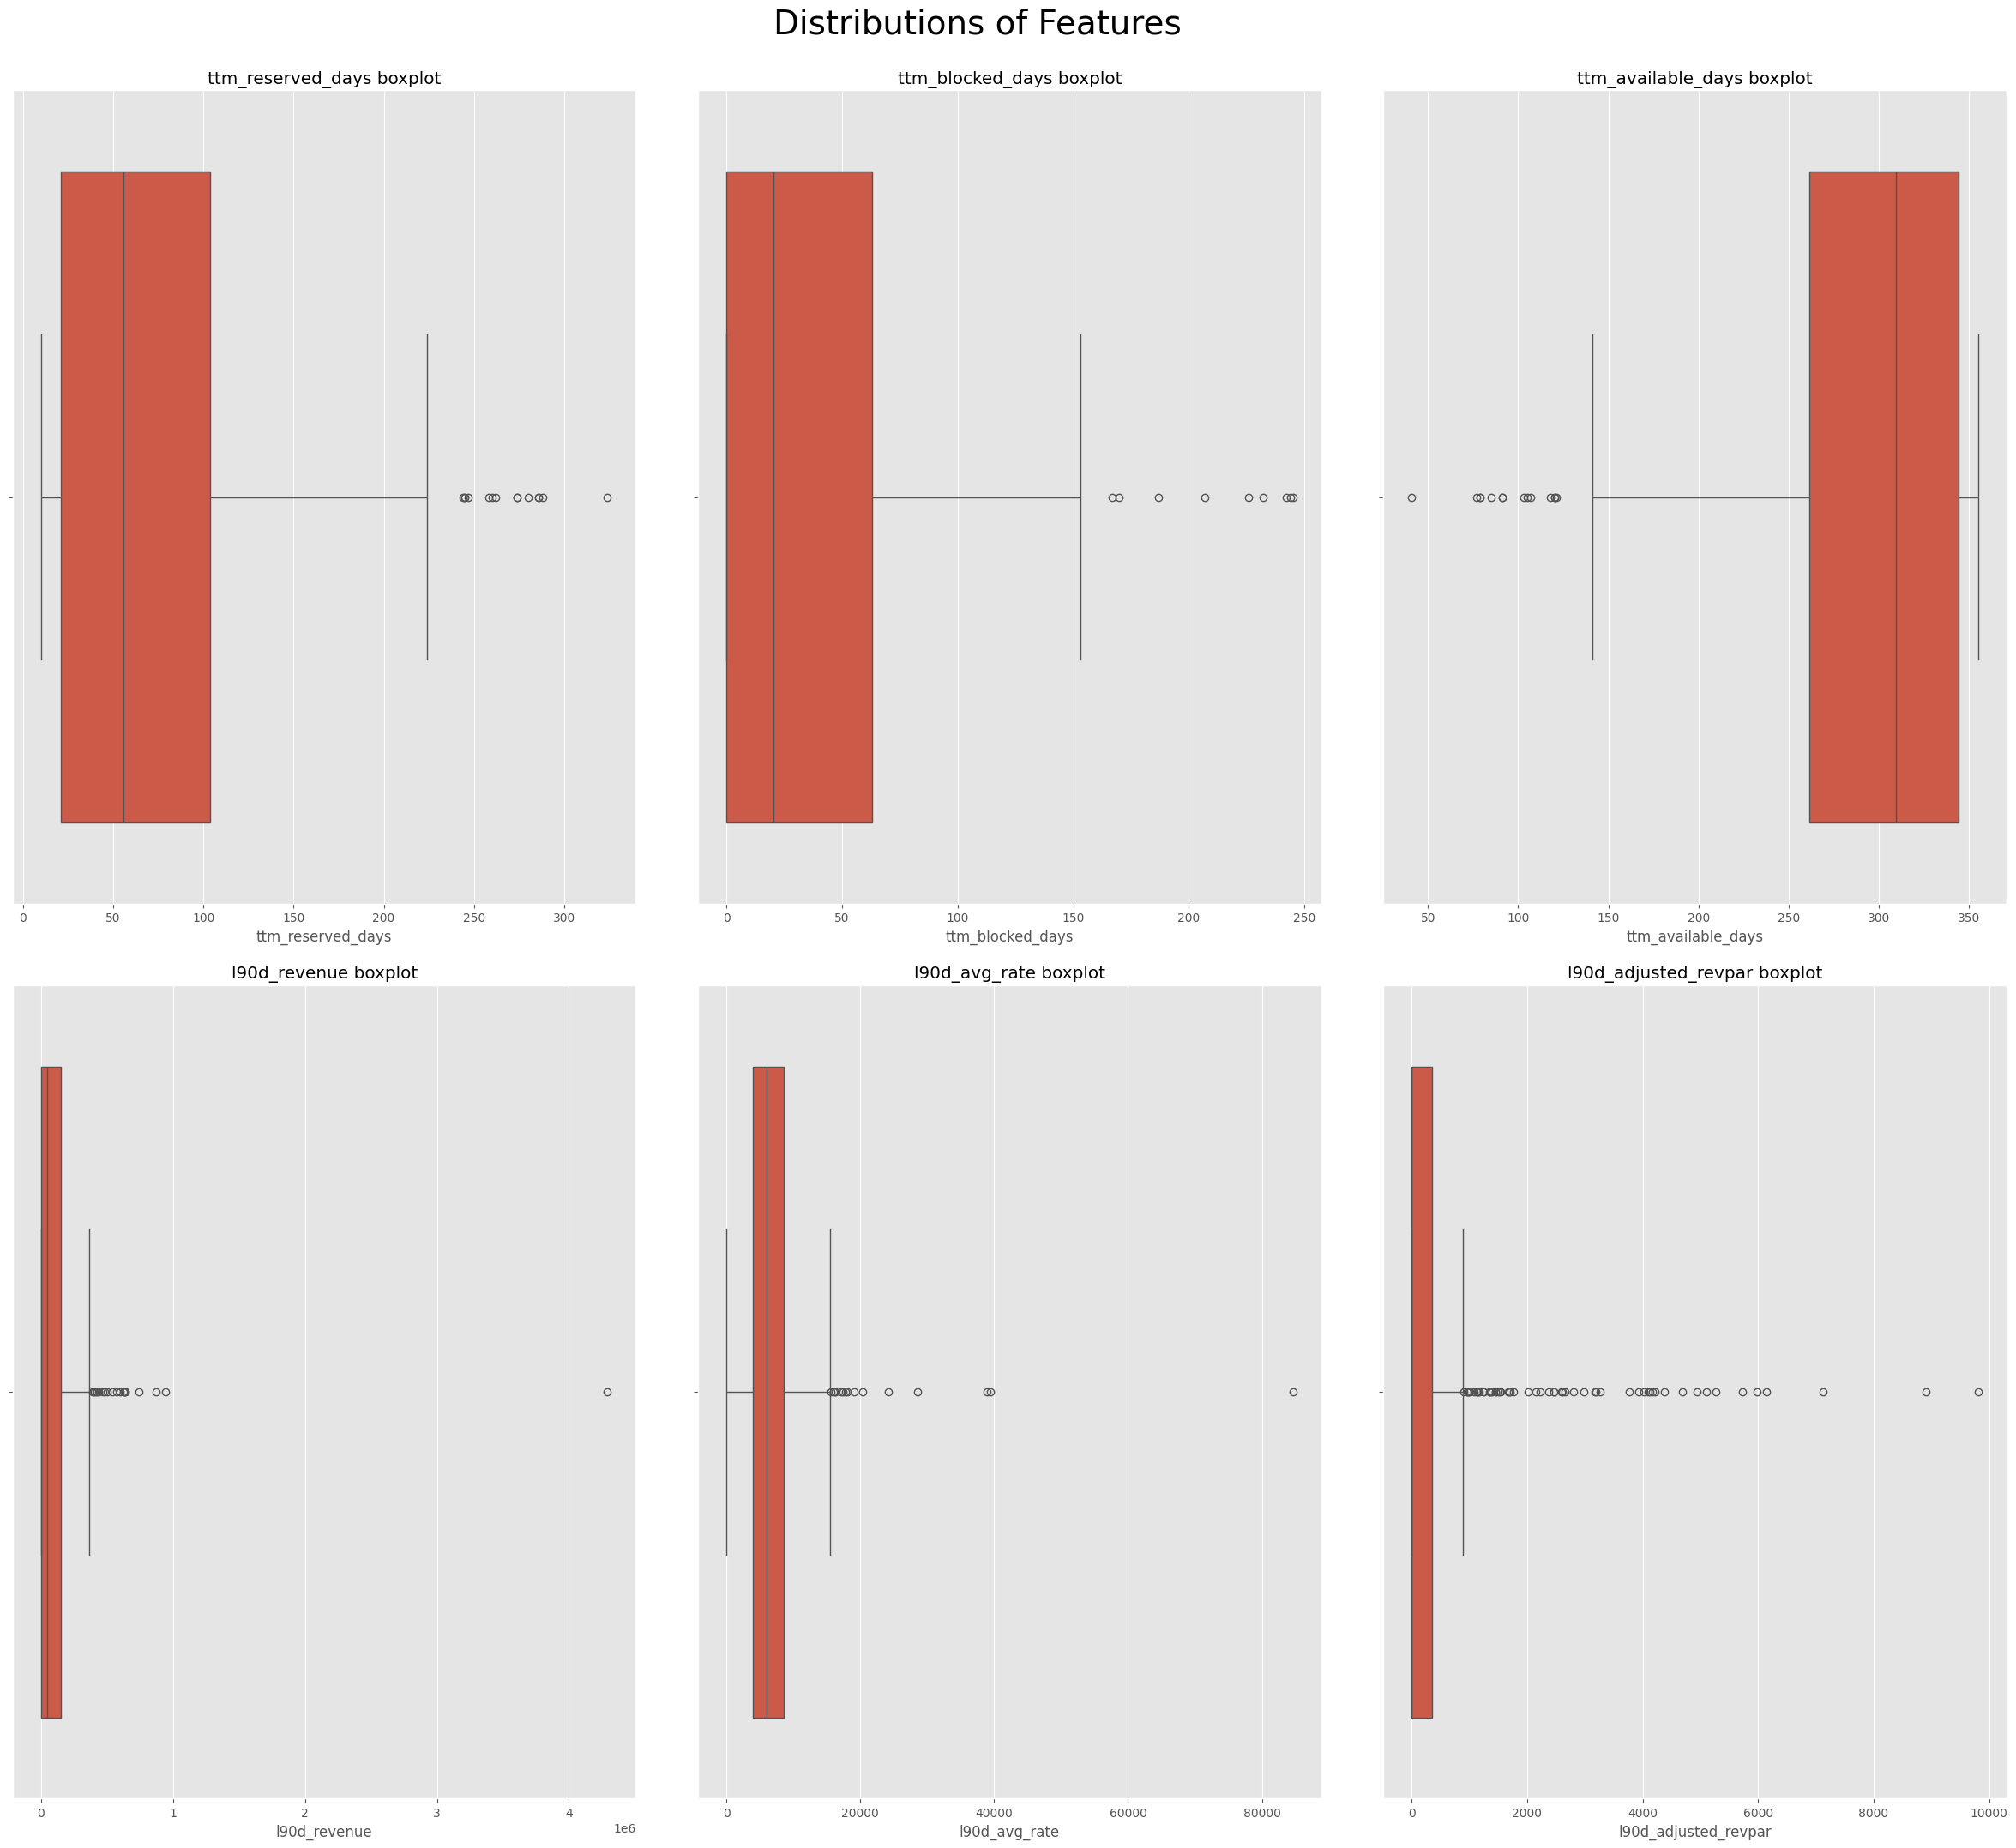

In [14]:
create_distributions(df_listings, cols_listings[8:], 2,3)

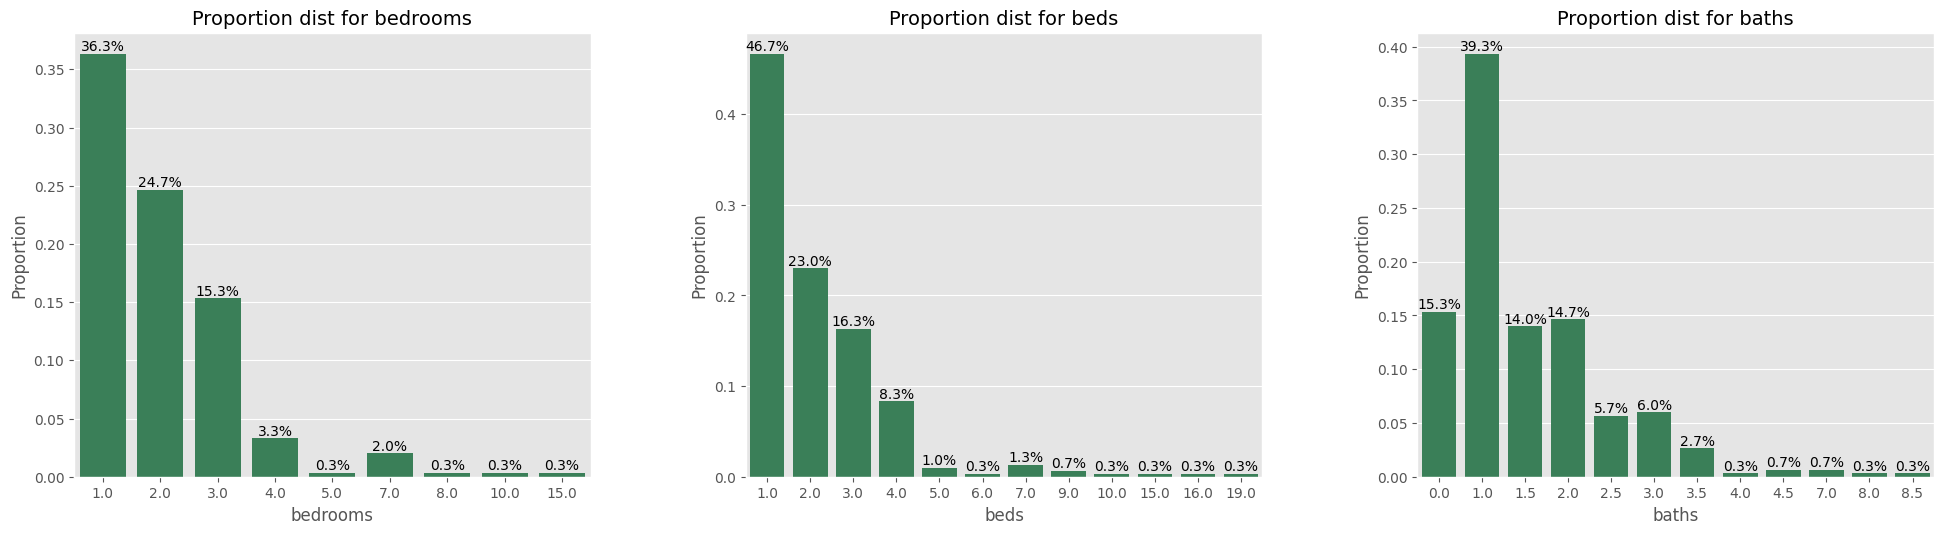

In [50]:
# Select categorical features
cat_cols = ['bedrooms', 'beds', 'baths']

# Define the figure canvas
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
plt.subplots_adjust(hspace=0.2, wspace=0.3, top=0.85)

# Loop through categorical columns and plot
for i, col in enumerate(cat_cols):
    ax = axs[i]
    sns.countplot(data=df_listings, x=col, color='seagreen', ax=ax, stat='proportion')
    ax.set_title(f'Proportion dist for {col}', fontsize=14)
    ax.set_ylabel("Proportion")

    # Annotate each bar in the current axis
    for p in ax.patches:
        prop = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        label = f'{prop:.1%}'  # Format as percentage
        ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=10)

plt.show()


In [46]:
df_listings.baths.value_counts(normalize=True).to_frame()

,proportion
baths,
1.0,0.393333
0.0,0.153333
2.0,0.146667
1.5,0.140000
3.0,0.060000
2.5,0.056667
3.5,0.026667
7.0,0.006667
4.5,0.006667


In [36]:
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,257,233475.0,5202.7,0.500,0.726,2594.2,3765.7,45,28,45
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,284,67833.0,6888.1,0.111,0.147,753.7,997.5,10,22,80
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,354,10078.0,2482.1,0.044,0.000,112.0,0.0,4,0,86
3,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,NaN,False,-1.2258,36.7679,...,350,80106.0,15639.3,0.056,0.000,890.1,0.0,5,0,85
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,58,4856316,Chichi,True,-1.3237,36.7059,...,326,65507.0,16196.3,0.044,0.055,727.9,897.4,4,17,86


In [58]:
# Summary statistics for df_calendar
df_calendar.iloc[:, 1:].describe().T

,count,mean,min,25%,50%,75%,max,std
date,3542,2025-02-13 11:23:00.237154048,2024-09-01 00:00:00,2024-11-01 00:00:00,2025-02-01 00:00:00,2025-05-01 00:00:00,2025-08-01 00:00:00,NaN
vacant_days,3542.0,24.111801,0.0,20.0,28.0,31.0,31.0,8.779706
reserved_days,3542.0,6.302654,0.0,0.0,1.0,10.0,31.0,8.745056
occupancy_rate,3542.0,0.207335,0.0,0.0,0.033,0.333,1.0,0.287834
min_nights_avg,2380.0,2.352941,1.0,1.0,1.0,2.0,31.0,4.175104
rate_avg,3542.0,7274.477132,1124.0,4056.25,6045.5,8578.5,102246.0,6844.2532
revenue,3542.0,45314.456804,0.0,0.0,7057.5,59069.0,2348193.0,98140.055884


**summary from the summary statistics on listings**
